In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings 
filterwarnings('ignore')

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE (3).csv',header=1)

In [4]:
df.shape

(246, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.loc[:122,'Region']=1

In [9]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']]=df[['Region']].astype(int)

In [10]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [11]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2


In [12]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [13]:
df=df.dropna().reset_index(drop=True)

In [14]:
df.shape

(244, 15)

In [15]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [17]:
df=df.drop(122).reset_index(drop=True)

In [19]:
df.shape

(243, 15)

In [25]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [26]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [27]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [37]:
objects=[features for features in df.columns 
         if df[features].dtype=='O']

In [38]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [39]:
for i in objects:
    if i!= 'Classes':
        df[i]=df[i].astype(float)

In [41]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [43]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [44]:
df.Classes=df.Classes.str.strip()

In [47]:
df.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [48]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


In [49]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [51]:
df.to_csv('cleanalgerianforest_fire.csv',index=False)

In [2]:
df=pd.read_csv('cleanalgerianforest_fire.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [4]:
df2=df.drop(['day','month','year'],axis=1)

In [5]:
df.shape

(243, 15)

In [6]:
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [7]:
df2.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [8]:
df2['Classes']=np.where(df2['Classes']=='not fire',0,1)

In [9]:
df2.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

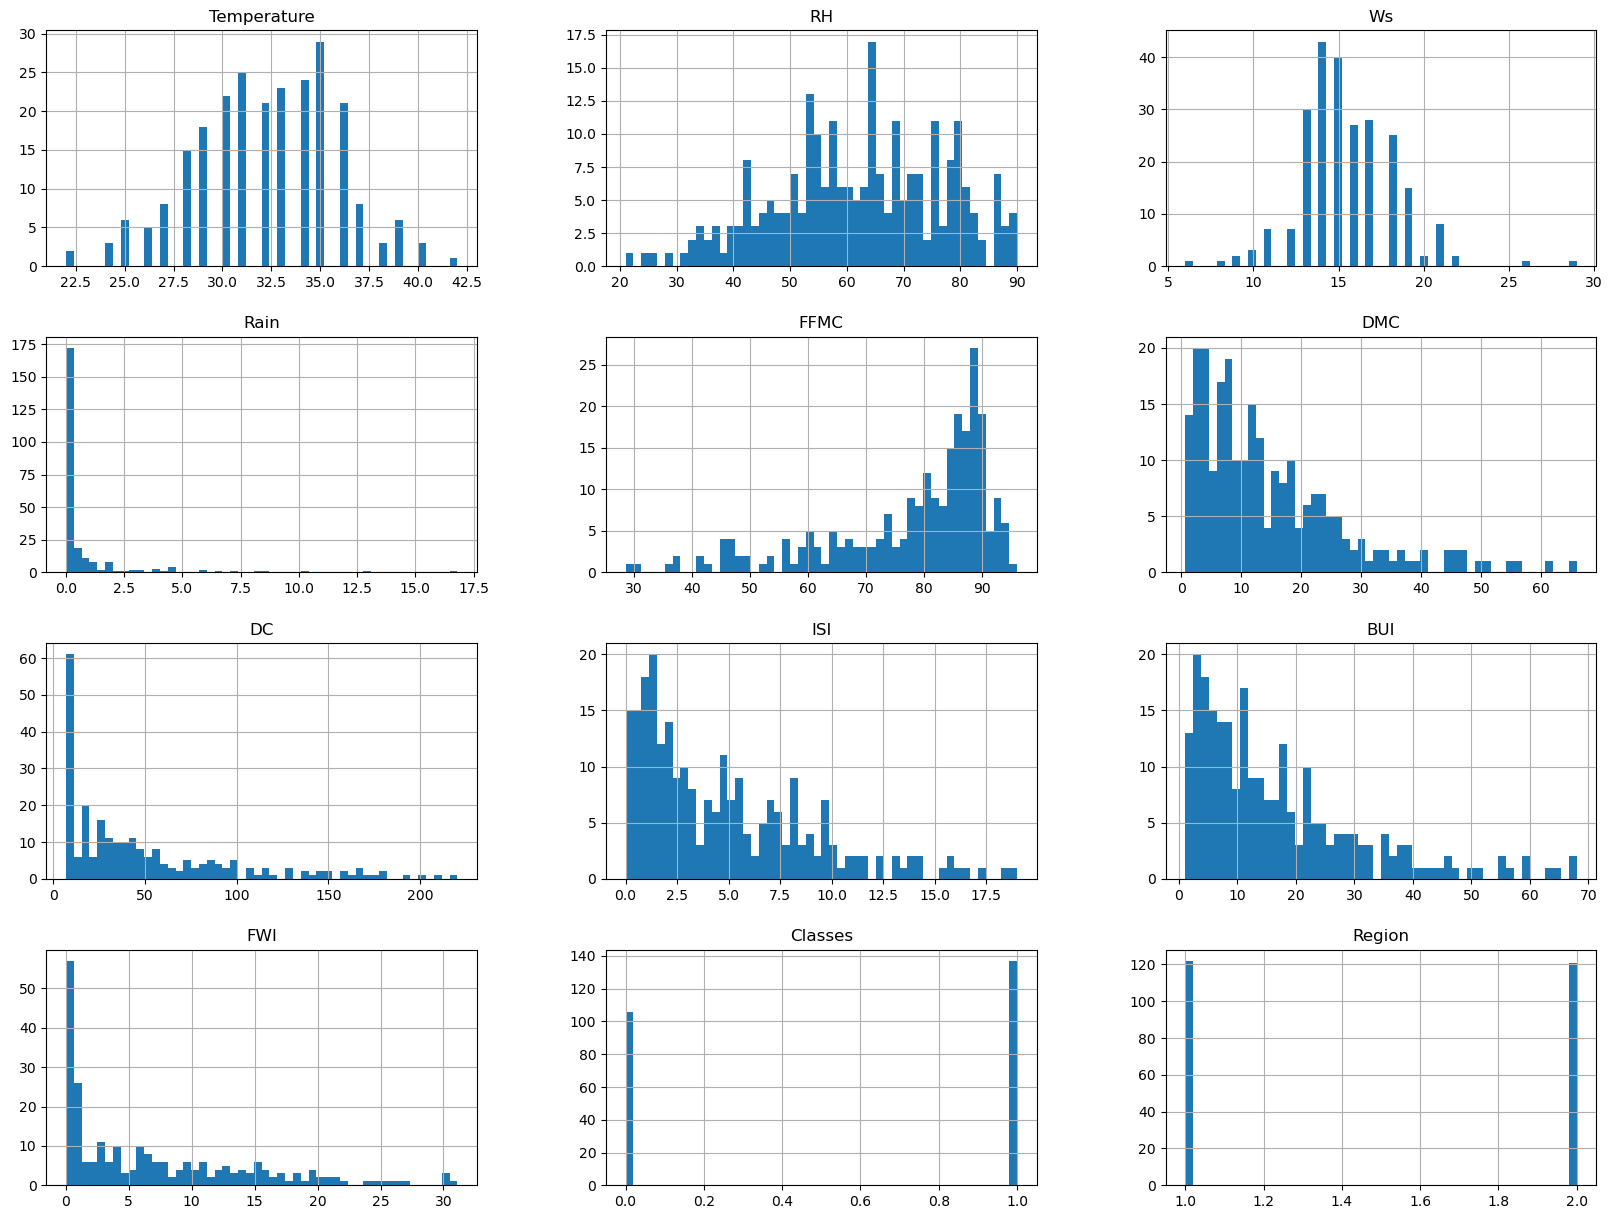

In [10]:
df2.hist(bins=50,figsize=(20,15))
plt.show()

In [11]:
percentage=df.Classes.value_counts(normalize=True)*100
percentage

Classes
fire        56.378601
not fire    43.621399
Name: proportion, dtype: float64

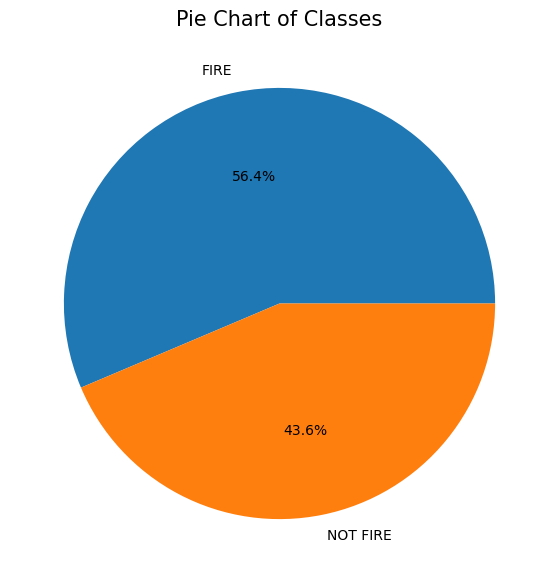

In [12]:
classeslabels=['FIRE','NOT FIRE']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classeslabels,autopct='%1.1f%%')
plt.title('Pie Chart of Classes',fontsize=15)
plt.show()

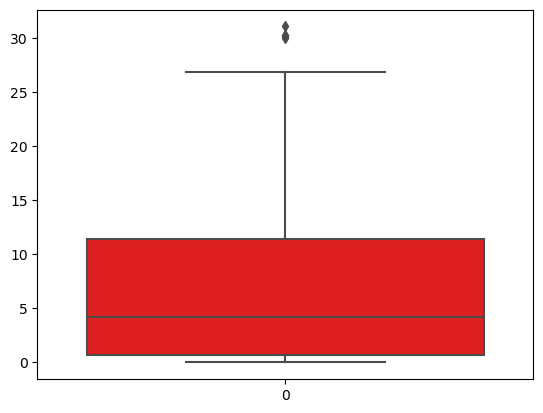

In [13]:
ax=sns.boxplot(df['FWI'],color='red')

In [14]:
dftemp=df.loc[df['Region']==1]

In [15]:
dftemp

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


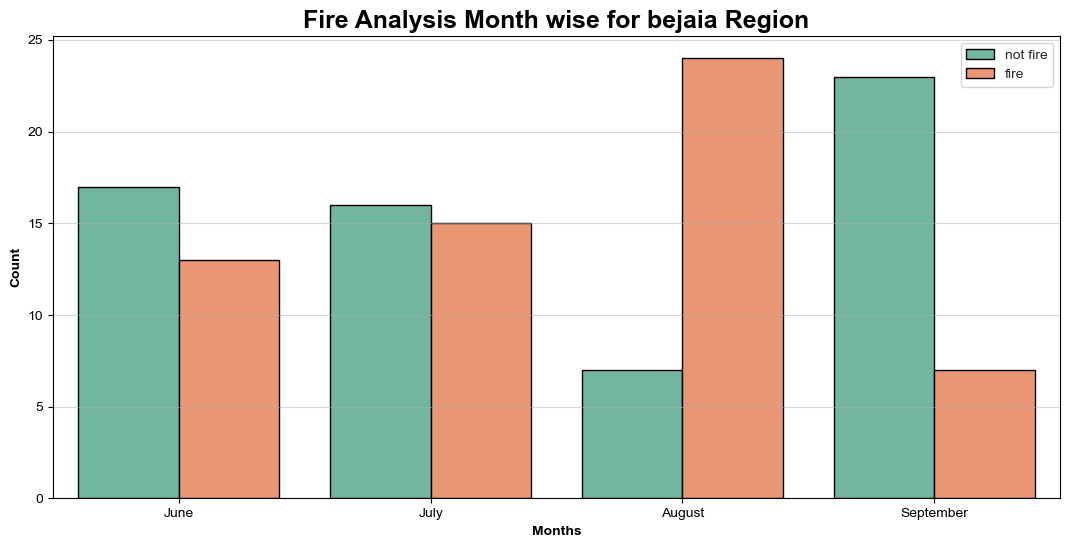

In [16]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp,ec='black',palette='Set2')
plt.title('Fire Analysis Month wise for bejaia Region',fontsize=18,weight='bold')
plt.ylabel('Count',weight='bold')
plt.xlabel('Months',weight='bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4),['June','July','August','September',])
plt.grid(alpha=0.5,axis='y')
plt.show()
              

In [17]:
dftemp2=df.loc[df['Region']==2]

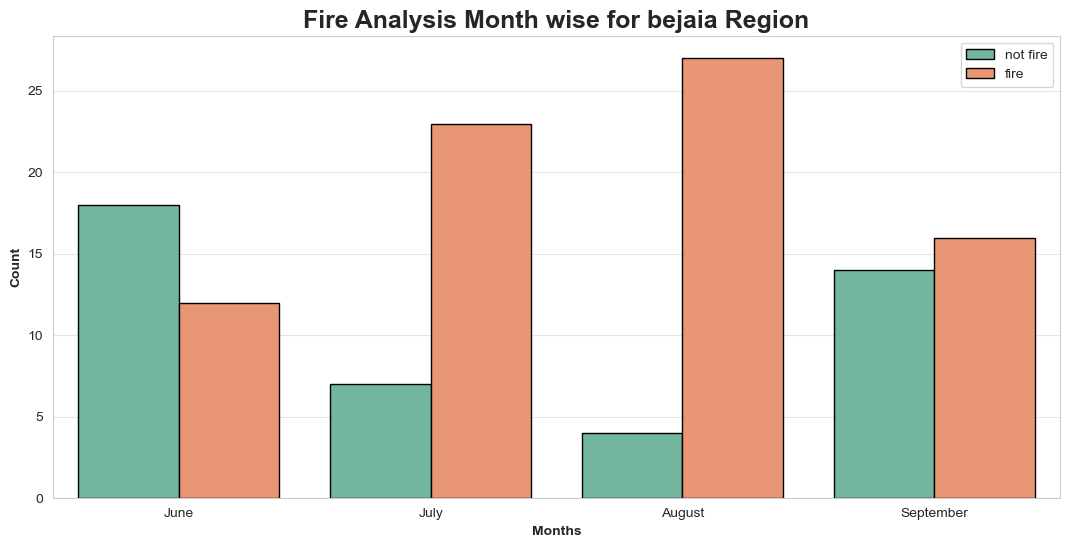

In [18]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp2,ec='black',palette='Set2')
plt.title('Fire Analysis Month wise for bejaia Region',fontsize=18,weight='bold')
plt.ylabel('Count',weight='bold')
plt.xlabel('Months',weight='bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4),['June','July','August','September',])
plt.grid(alpha=0.5,axis='y')
plt.show()
              

In [23]:
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature=df2.groupby([feature],as_index=False)['Classes'].sum()
    ax=sns.barplot(x=feature,y='Classes',data=by_feature[[feature,'Classes']],estimator=sum)
    ax.set(xlabel=xlabel,ylabel='Fire Count')

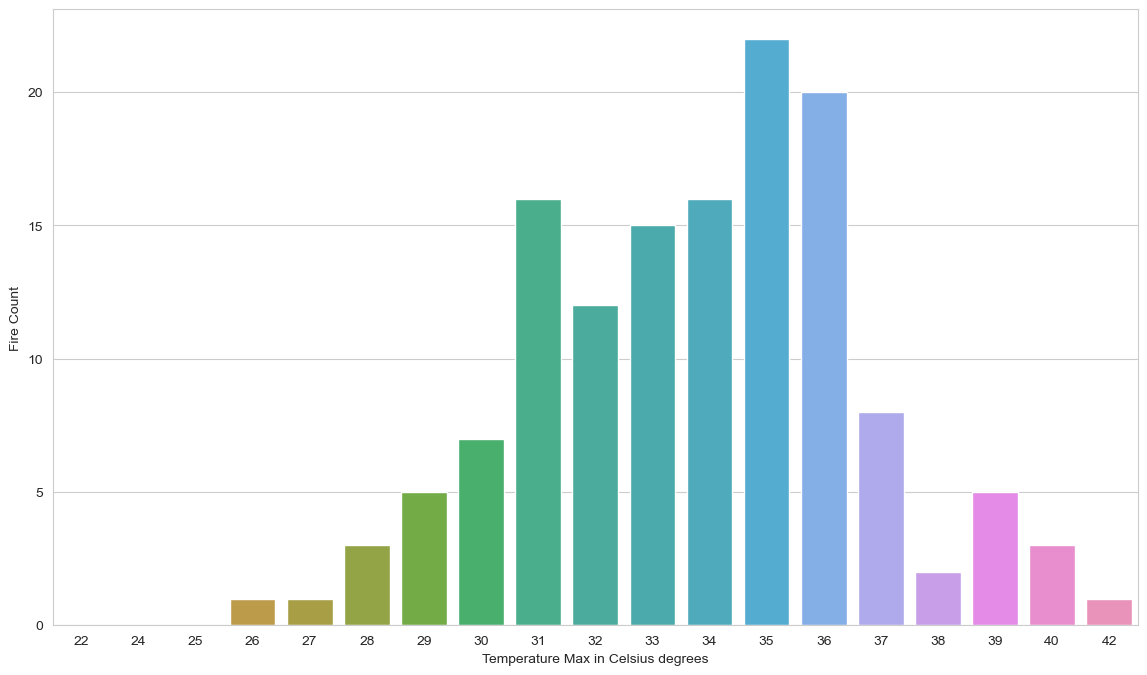

In [24]:
barchart('Temperature','Temperature Max in Celsius degrees')

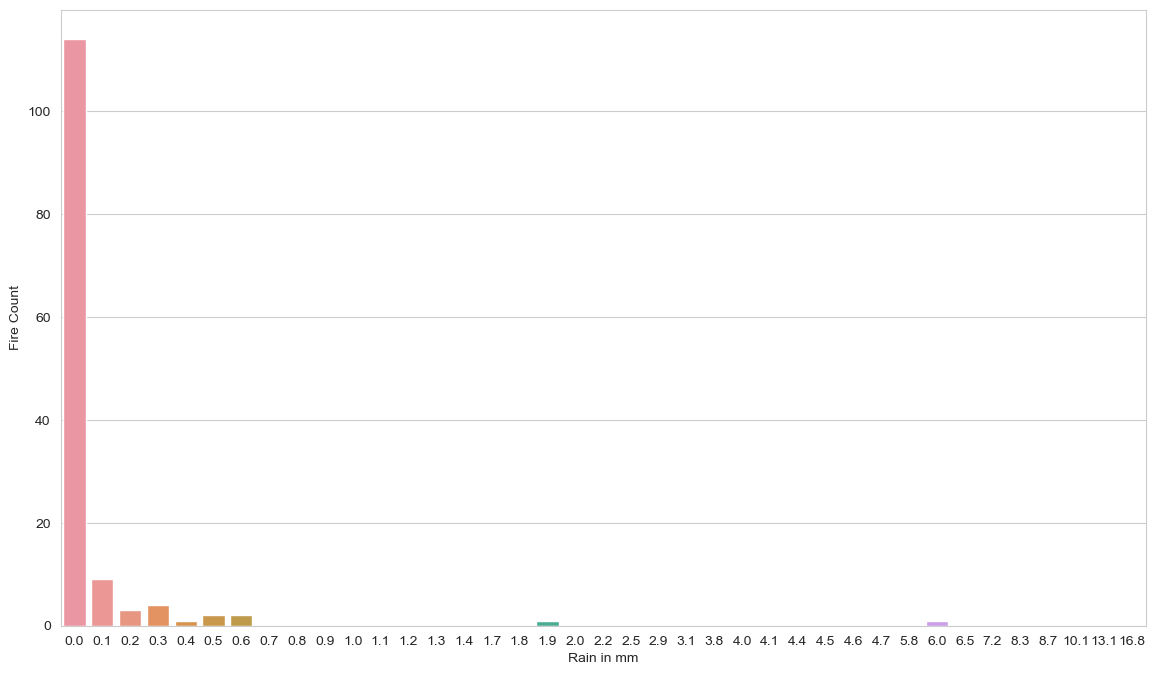

In [25]:
barchart('Rain','Rain in mm')

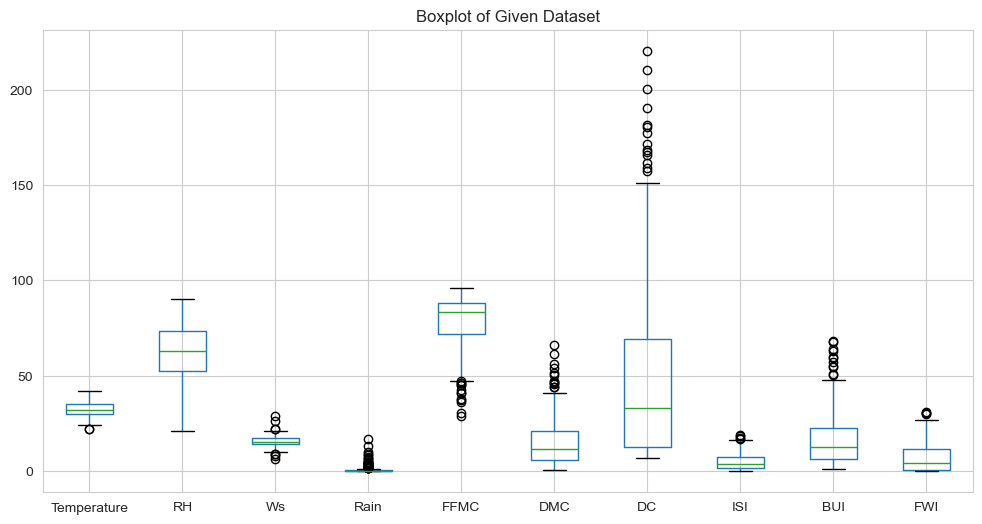

In [27]:
dftemp=df2.drop(['Classes','Region'],axis=1)
fig=plt.figure(figsize=(12,6))
ax=dftemp.boxplot()
ax.set_title('Boxplot of Given Dataset')
plt.show()

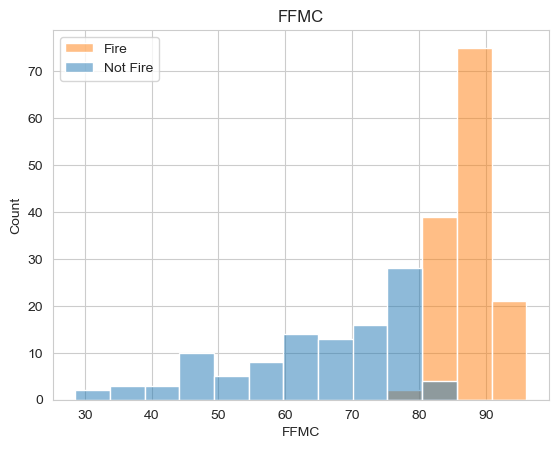

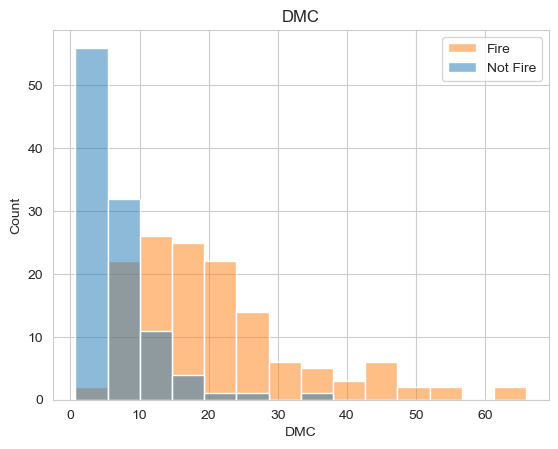

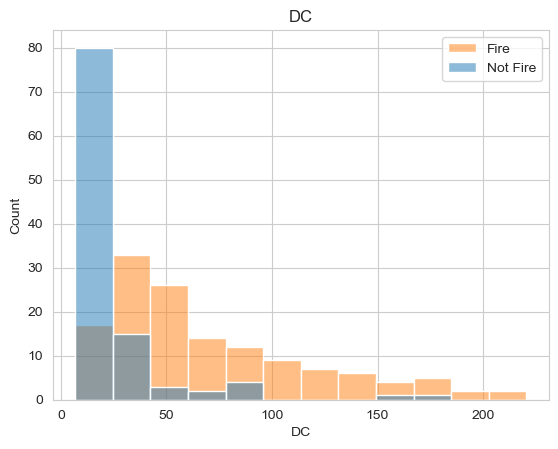

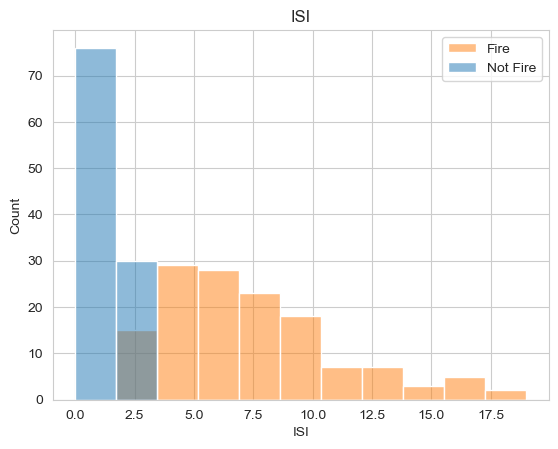

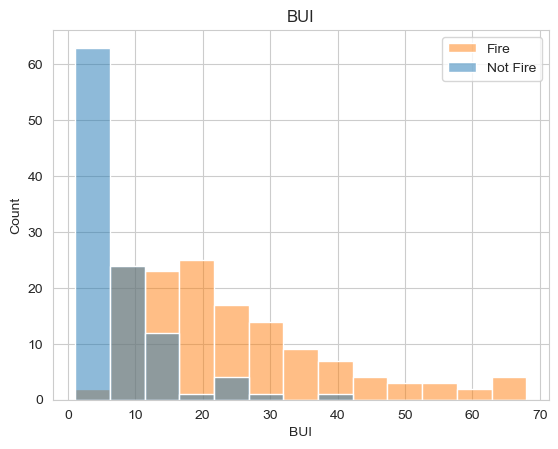

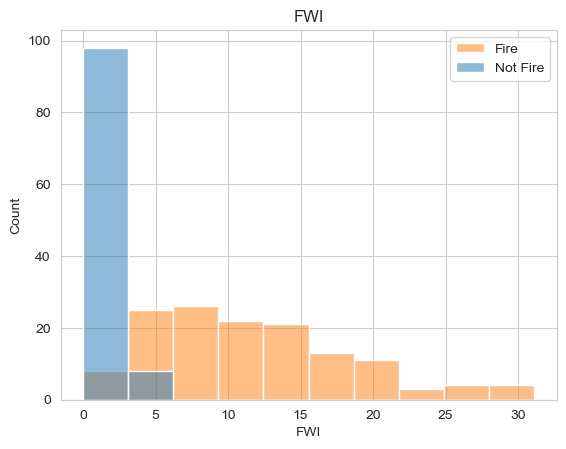

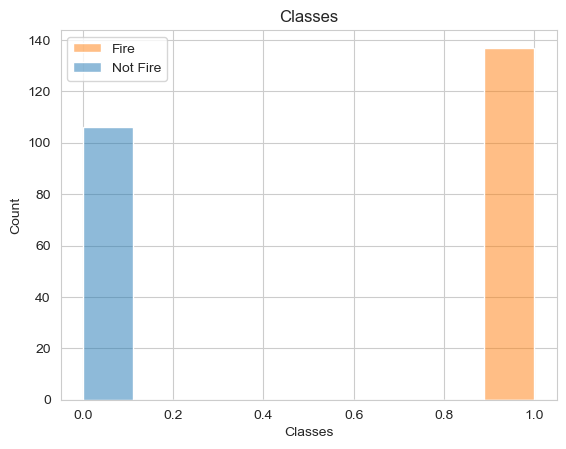

In [28]:
dftemp=df2.drop(['Region','Temperature','Rain','Ws','RH'],axis=1)
for feature in dftemp:
    sns.histplot(data=dftemp,x=feature,hue='Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()